In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser

from SignalModule import SignalGenerator, Signal
from SlidingWindowModule import SlidingWindow

def plot_persistences_dim1_on_ax(data: np.ndarray, ax):
    if data.ndim != 2 or data.shape[0] != 2:
        raise ValueError("Input array must have shape (2, n)")

    births, deaths = data
    persistences = deaths - births

    try:
        longest_idx = np.argmax(persistences)
        longest_persistence = persistences[longest_idx]

        average_persistence = np.mean(persistences)
    except ValueError:
        longest_idx = 0
        longest_persistence = 0
        average_persistence = 0

    y_positions = np.arange(len(births))


    for i, (b, d) in enumerate(zip(births, deaths)):
        color = "tab:blue" if i == longest_idx else "tab:orange"
        ax.hlines(y_positions[i], b, d, color=color, linewidth=2)

    ax.set_title("Persistence (H₁)")
    ax.set_xlabel("Value")
    ax.set_yticks([])

def get_persistances_dim1(data: np.ndarray):
    if data.ndim != 2 or data.shape[0] != 2:
        raise ValueError("Input array must have shape (2, n)")

    births, deaths = data
    persistences = deaths - births

    if len(persistences) == 0:
        return 0, 0, 0

    longest_idx = np.argmax(persistences)
    longest_persistence = persistences[longest_idx]

    average_persistence = np.mean(persistences)
    median_persistence = np.median(persistences)

    return longest_persistence, average_persistence, median_persistence

def main(
    function_name="sin",
    function=lambda x: np.sin(x),
    start_time=0,
    end_time=20,
    step=0.05,
    noise=0.11,
    M=20,
    tau=0.0031,
    method="pca",
    number_of_points=100
):
    signal = SignalGenerator(
        start=start_time,
        end=end_time,
        step=step,
        function=function,
        noise=noise
    ).generate()

    signal.normalize(number_of_points=number_of_points)
    slidingWindow = SlidingWindow(signal=signal, M=M, tau=tau)

    diagrams = ripser(
        slidingWindow.get_distance_matrix(),
        maxdim=1,
        distance_matrix=True
    )["dgms"][1].T  # H₁

    # ---------- Master figure ----------
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(2, 2)

    ax_signal = fig.add_subplot(gs[0, :])
    ax_embedding = fig.add_subplot(gs[1, 0])
    ax_persistence = fig.add_subplot(gs[1, 1])

    # ---------- Draw ----------
    signal.plot_on_ax(
        ax_signal,
        title=f"{function_name}(t), noise={noise}"
    )

    slidingWindow.plot_on_ax(
        ax_embedding,
        d=2,
        method=method
    )

    plot_persistences_dim1_on_ax(
        diagrams,
        ax_persistence
    )

    # ---------- Bottom text ----------
    max_p, avg_p, med_p = get_persistances_dim1(diagrams)
    fig.text(
        0.5,
        -0.05,
        f"Longest persistence: {max_p:.4f}, \nAverage persistence: {avg_p:.4f}, \nMedian persistence: {med_p:.4f}",
        ha="center",
        fontsize=14,
        fontweight="bold"
    )


    # ---------- Super title ----------
    fig.suptitle(
        f"""
Signal → Sliding Window → Persistent Homology

function = {function_name}
time ∈ [{start_time}, {end_time}], step = {step}, noise = {noise}
M = {M}, τ = {tau}, reduction = {method.upper()}
""",
        fontsize=18
    )

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()



ValueError: attempt to get argmax of an empty sequence

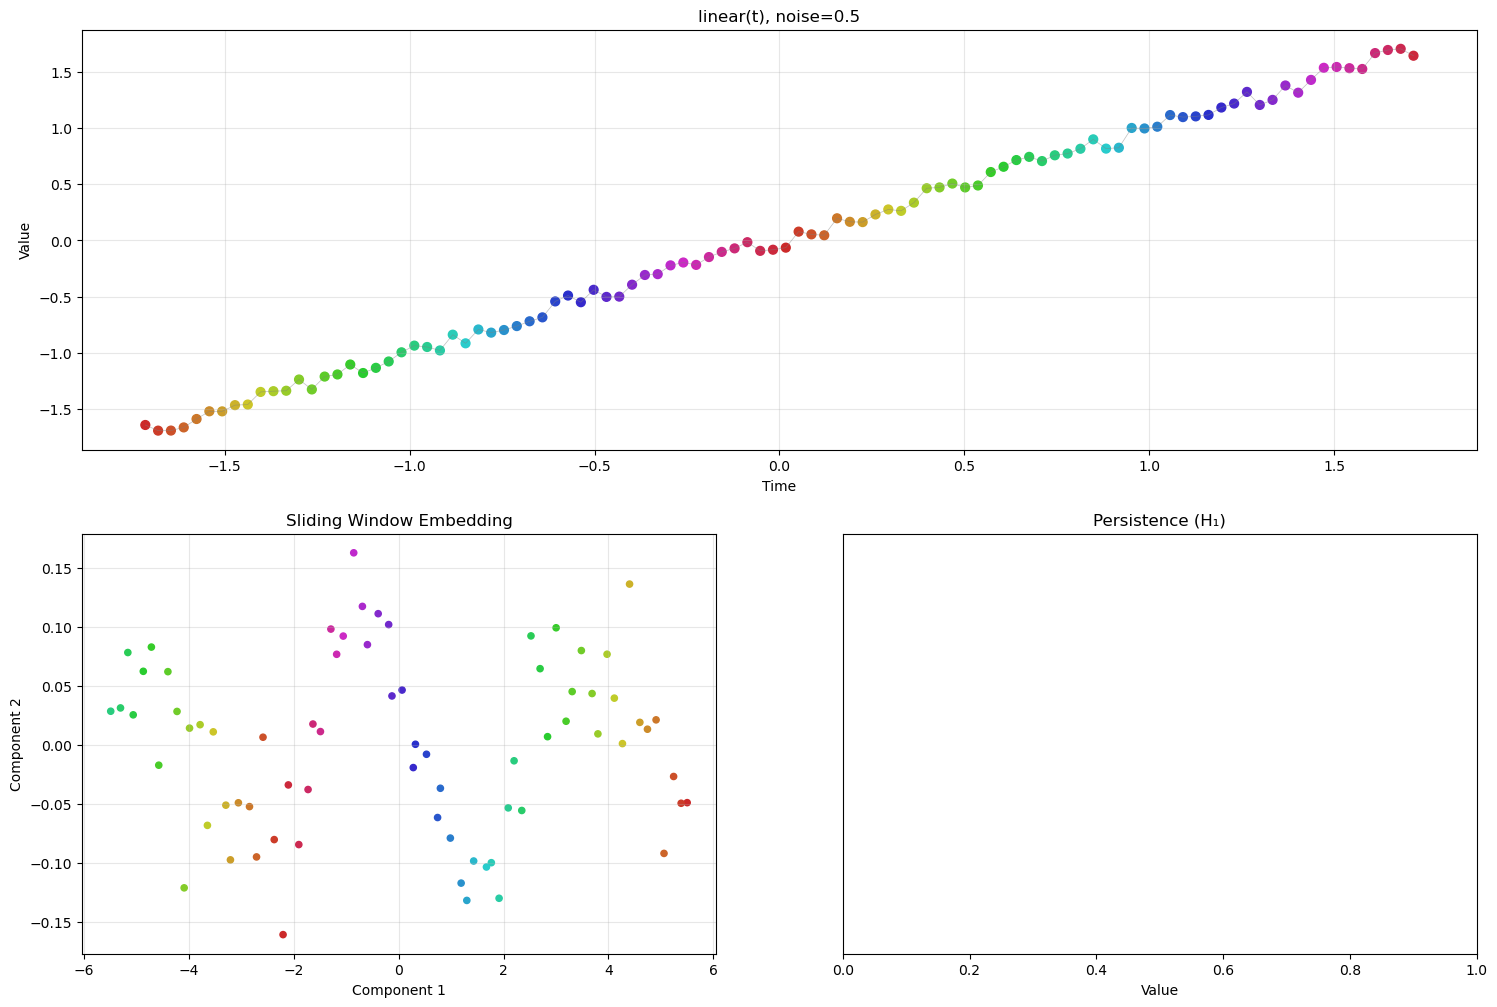

In [9]:
main(
    function_name="linear",
    function=lambda x: x,
    start_time=0,
    end_time=20,
    step=0.02,
    noise=0.5,
    M=20,
    tau=0.05,
    method="pca",
    number_of_points=100
)

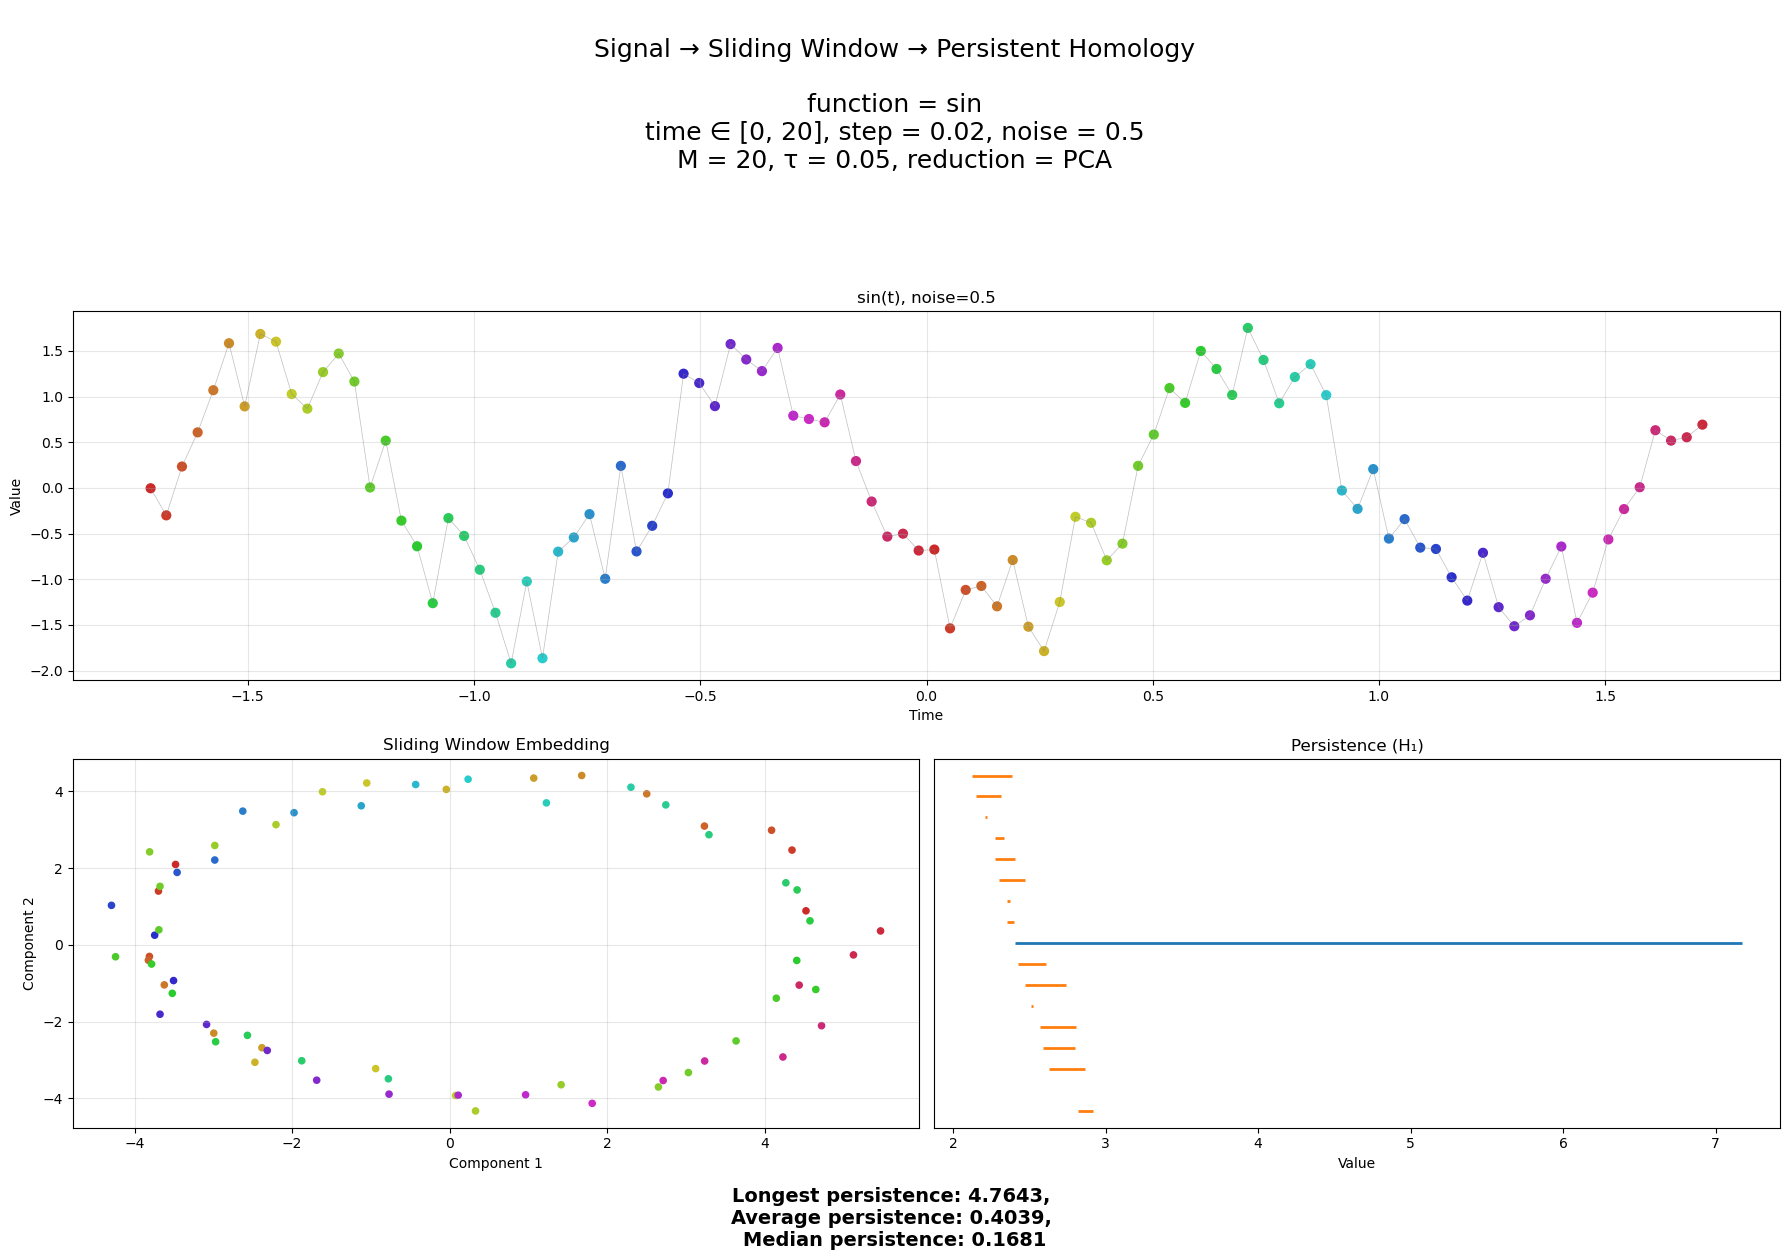

In [3]:
main(
    function_name="sin",
    function=lambda x: np.sin(x),
    start_time=0,
    end_time=20,
    step=0.02,
    noise=0.5,
    M=20,
    tau=0.05,
    method="pca",
    number_of_points=100
)

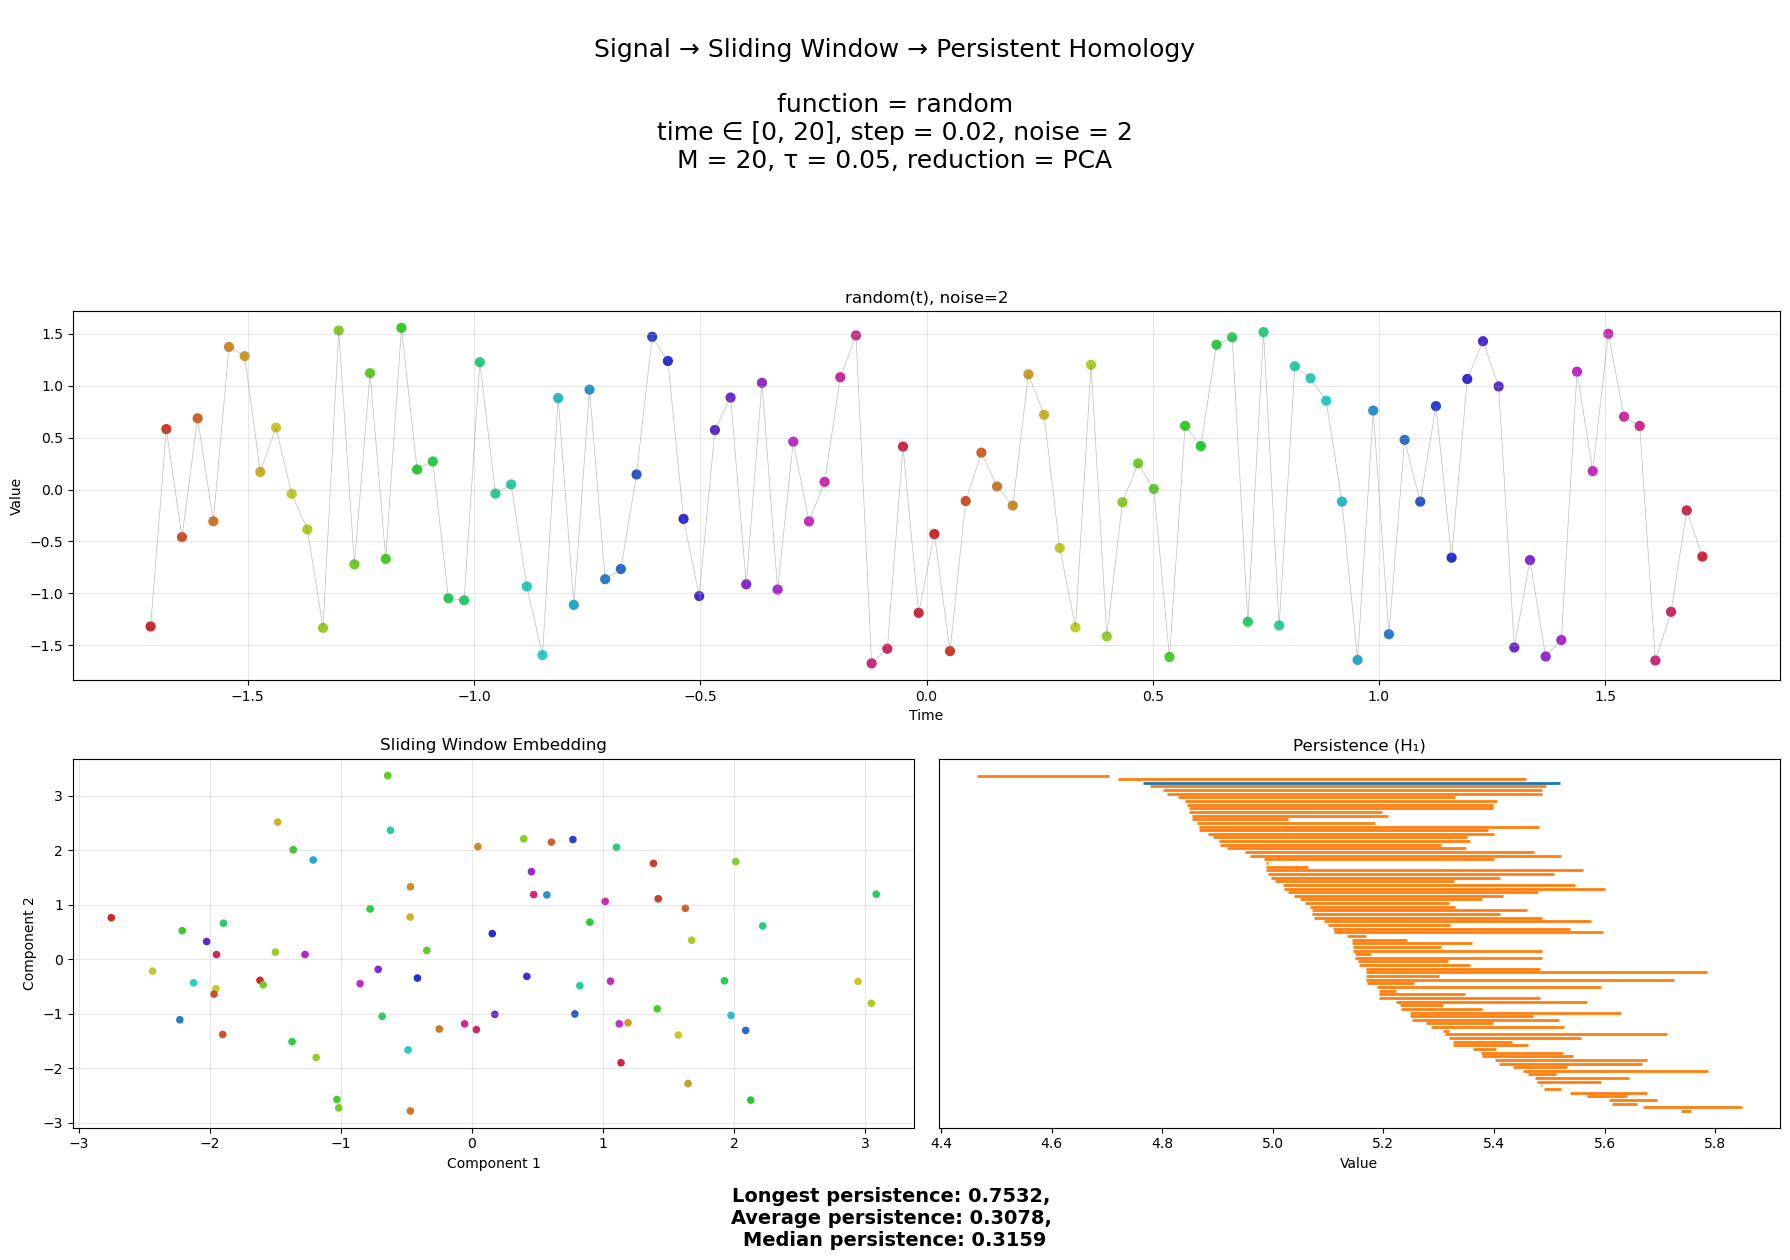

In [4]:
main(
    function_name="random",
    function=lambda x: 0,
    start_time=0,
    end_time=20,
    step=0.02,
    noise=2,
    M=20,
    tau=0.05,
    method="pca",
    number_of_points=100
)

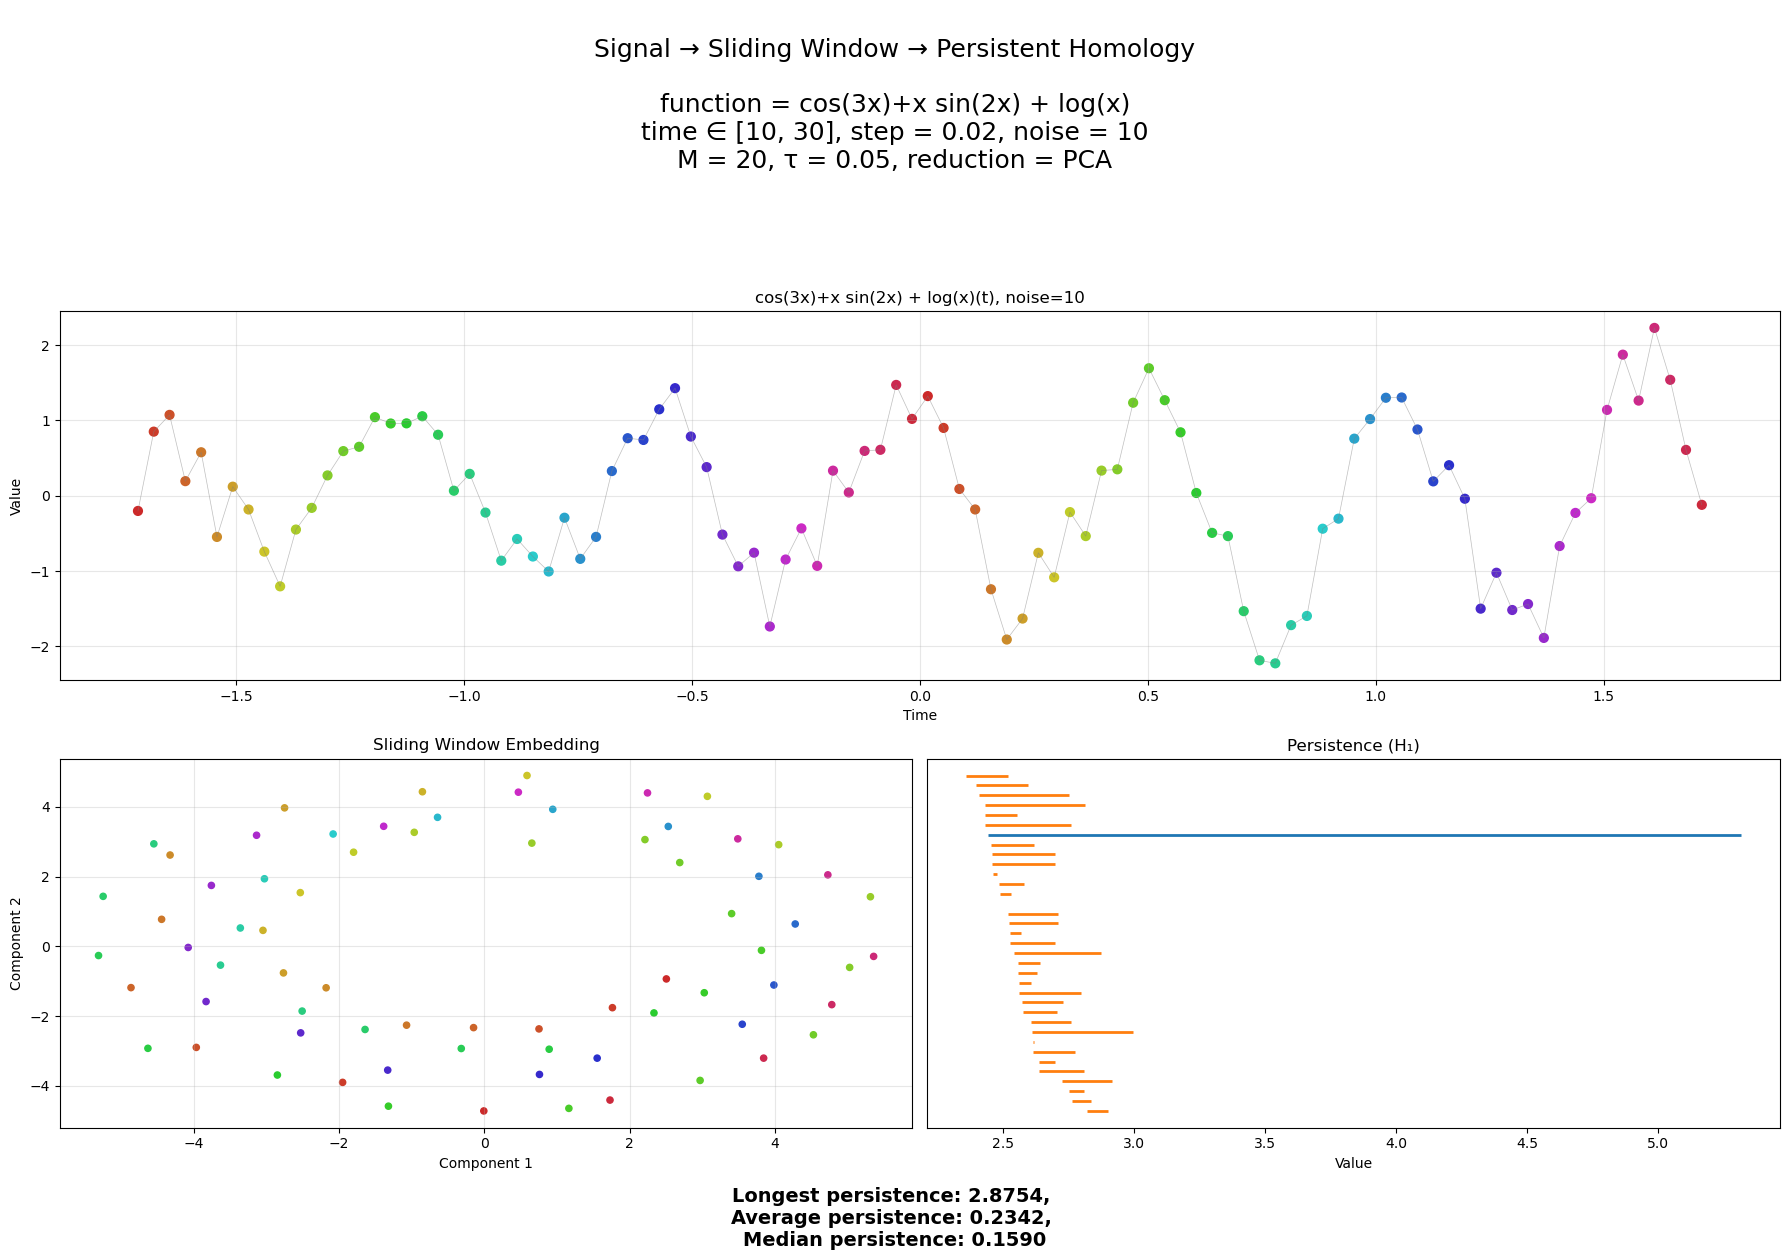

In [5]:
main(
    function_name="cos(3x)+x sin(2x) + log(x)",
    function=lambda x: np.cos(3*x) + x * np.sin(2*x) + np.log(x),
    start_time=10,
    end_time=30,
    step=0.02,
    noise=10,
    M=20,
    tau=0.05,
    method="pca",
    number_of_points=100
)

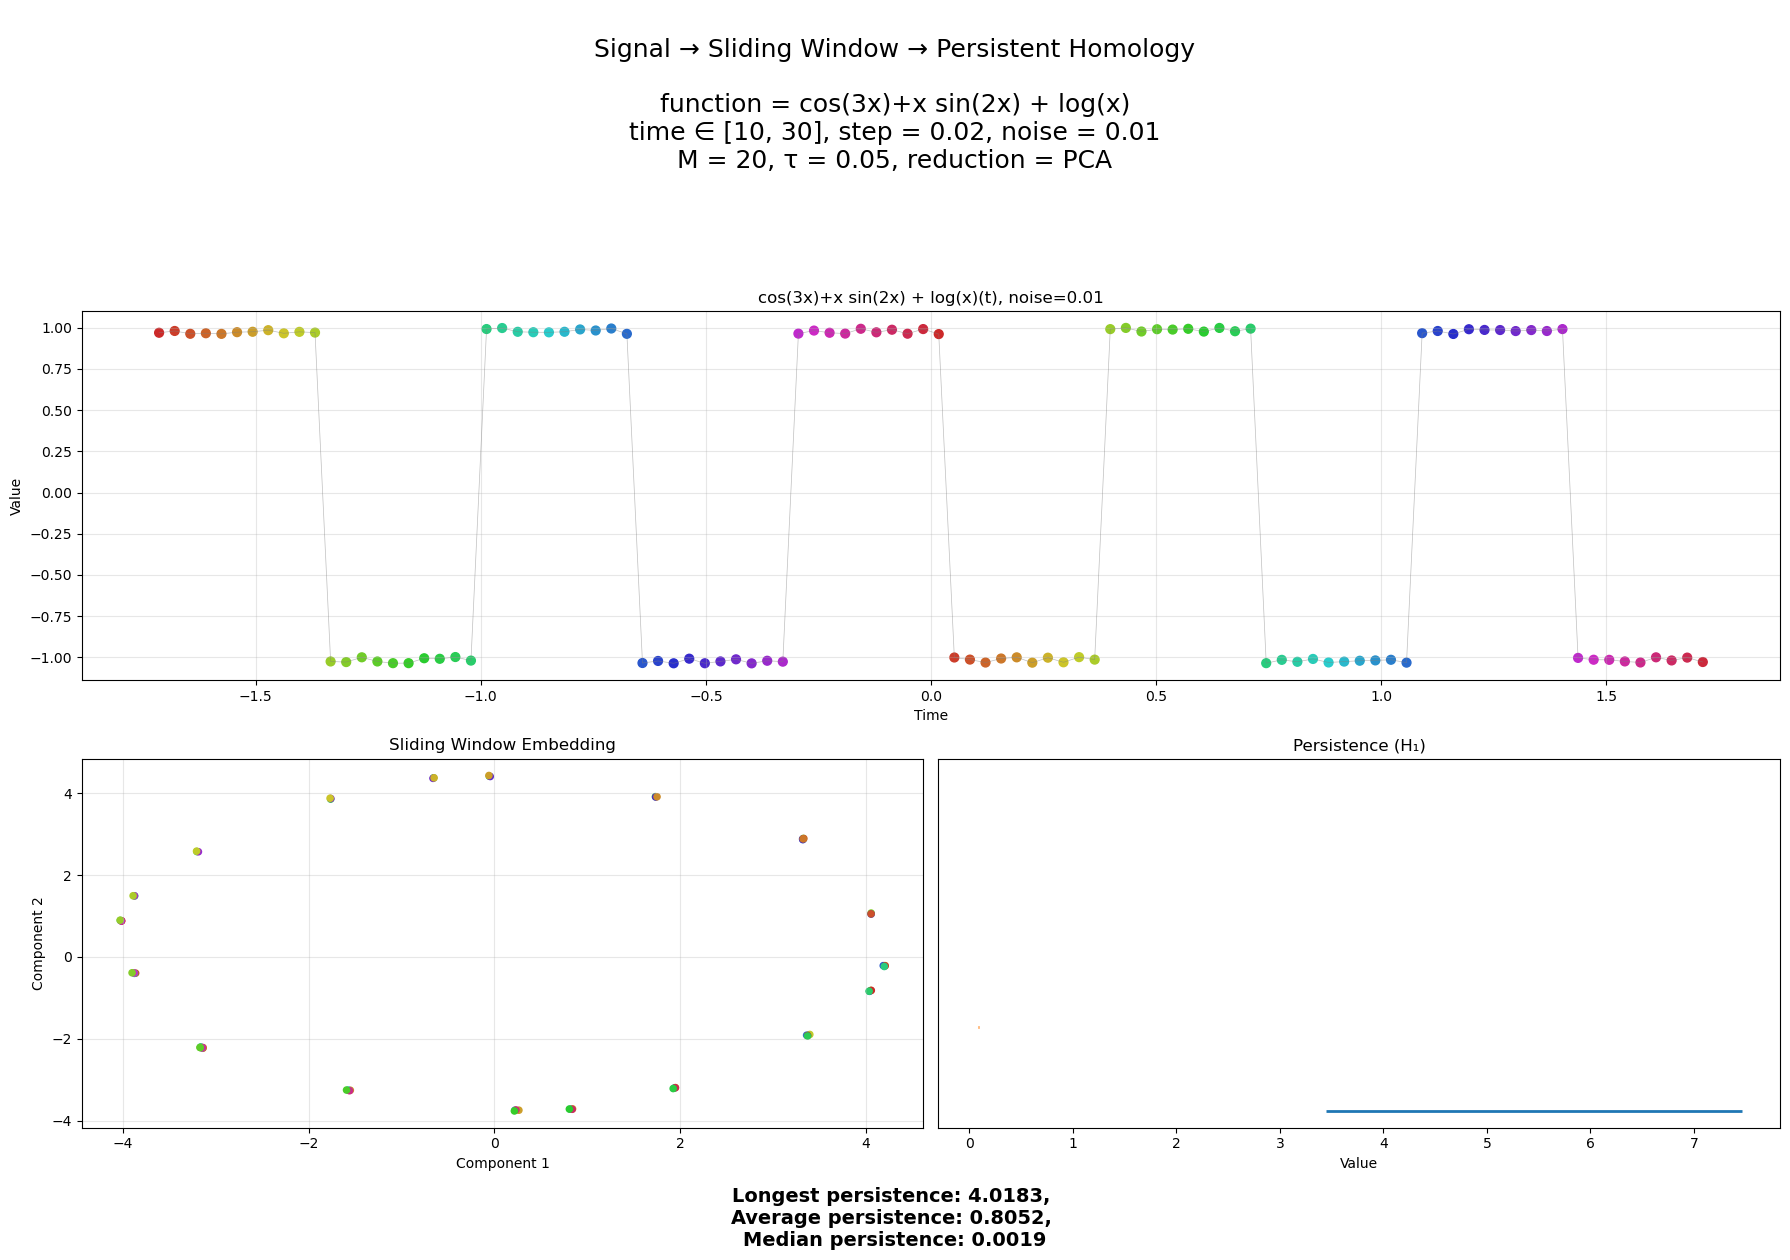

In [6]:
main(
    function_name="cos(3x)+x sin(2x) + log(x)",
    function=lambda x: 0 if int(x/2)%2 == 0 else 1,
    start_time=10,
    end_time=30,
    step=0.02,
    noise=0.01,
    M=20,
    tau=0.05,
    method="pca",
    number_of_points=100
)